# Problem Target

## Main Target
Predict which customer will churn (i.e., the "Churn" field is 1).

## Sub Target
- Analyze which characteristics (e.g., Gender, CityTier, HourSpendOnApp, PreferredPaymentMode, Complain, DaySinceLastOrder, etc.) have a significant impact on churn.
- Identify high-risk churn groups and predictable subgroups.
- Design models that can provide early warnings of churn (e.g., regularly predicting the latest data).
- Design intervention strategies (e.g., coupons, service optimization suggestions) based on the high-risk churn model.

# Exploratory Data Analysis (EDA)

In [50]:
# Importing necessary libraries
import pandas as pd

# Loading the Excel file into a DataFrame
xls = pd.ExcelFile('loblaws.xlsx')
print(xls.sheet_names)
print("\n")

data = pd.read_excel('loblaws.xlsx', sheet_name='E Comm')

# Displaying basic information about the DataFrame
print(data.head())
print("\n")
data.info()
print("\n")
data.describe(include='all')

['Data Dict', 'E Comm']


   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionS

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5630,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,0.168384,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500


In [51]:
# Churn rate
print(data['Churn'].value_counts())
print("\n")
print(data['Churn'].value_counts(normalize=True))

Churn
0    4682
1     948
Name: count, dtype: int64


Churn
0    0.831616
1    0.168384
Name: proportion, dtype: float64


- Total of 5630 records (4682 + 948)
- 83% of records have a Churn=0 (no churn), and 17% have a Churn=1 (churn)

In [52]:
# Crosstab of each item vs Churn
cross_tabs = {
    'Tenure_vs_Churn': pd.crosstab(data['Tenure'], data['Churn']),
    'PreferredLoginDevice_vs_Churn': pd.crosstab(data['PreferredLoginDevice'], data['Churn']),
    'CityTier_vs_Churn': pd.crosstab(data['CityTier'], data['Churn']),
    'WarehouseToHome_vs_Churn': pd.crosstab(data['WarehouseToHome'], data['Churn']),
    'PreferredPaymentMode_vs_Churn': pd.crosstab(data['PreferredPaymentMode'], data['Churn']),
    'Gender_vs_Churn': pd.crosstab(data['Gender'], data['Churn']),
    'HourSpendOnApp_vs_Churn': pd.crosstab(data['HourSpendOnApp'], data['Churn']),
    'NumberOfDeviceRegistered_vs_Churn': pd.crosstab(data['NumberOfDeviceRegistered'], data['Churn']),
    'PreferedOrderCat_vs_Churn': pd.crosstab(data['PreferedOrderCat'], data['Churn']),
    'SatisfactionScore_vs_Churn': pd.crosstab(data['SatisfactionScore'], data['Churn']),
    'MaritalStatus_vs_Churn': pd.crosstab(data['MaritalStatus'], data['Churn']),
    'NumberOfAddress_vs_Churn': pd.crosstab(data['NumberOfAddress'], data['Churn']),
    'Complain_vs_Churn': pd.crosstab(data['Complain'], data['Churn']),
    'OrderAmountHikeFromlastYear_vs_Churn': pd.crosstab(data['OrderAmountHikeFromlastYear'], data['Churn']),
    'CouponUsed_vs_Churn': pd.crosstab(data['CouponUsed'], data['Churn']),
    'OrderCount_vs_Churn': pd.crosstab(data['OrderCount'], data['Churn']),
    'DaySinceLastOrder_vs_Churn': pd.crosstab(data['DaySinceLastOrder'], data['Churn']),
    'CashbackAmount_vs_Churn': pd.crosstab(data['CashbackAmount'], data['Churn']),
}

def safe_sheet_name(name, max_len=31):
    return name[:max_len]

# Save to Excel, one cross table per page.
with pd.ExcelWriter("churn_crosstab_report.xlsx") as writer:
    for sheet_name, df in cross_tabs.items():
        safe_name = safe_sheet_name(sheet_name)
        df.to_excel(writer, sheet_name=safe_name)

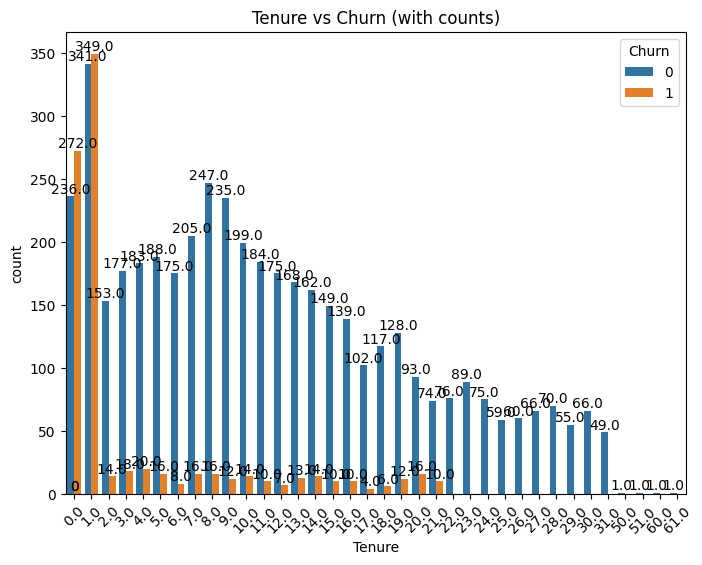

In [53]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

# Crosstab of Tenure vs Churn
ax = sns.countplot(x='Tenure', hue='Churn', data=data)

# Visualization of Tenure vs Churn
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.title('Tenure vs Churn (with counts)')
plt.ylabel('count')
plt.show()

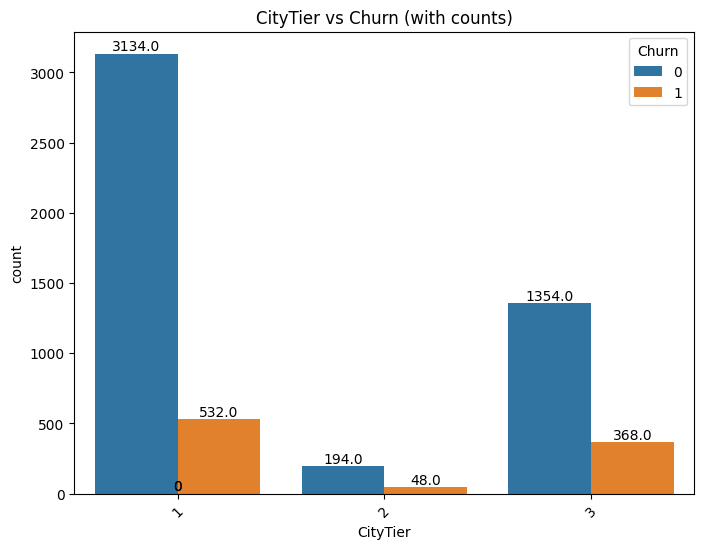

In [54]:
plt.figure(figsize=(8,6))

# Crosstab of CityTier vs Churn
ax = sns.countplot(x='CityTier', hue='Churn', data=data)

# Visualization of CityTier vs Churn
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.title('CityTier vs Churn (with counts)')
plt.ylabel('count')
plt.show()

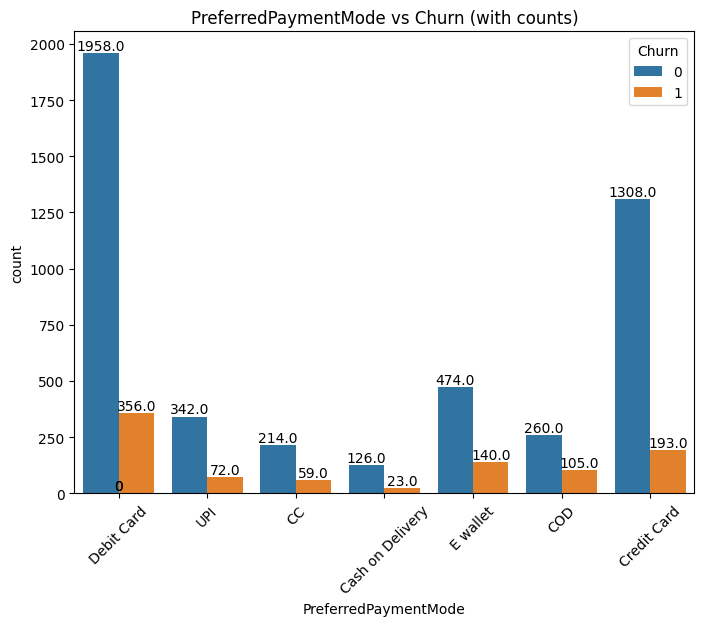

In [55]:
plt.figure(figsize=(8,6))

# Crosstab of PreferredPaymentMode vs Churn
ax = sns.countplot(x='PreferredPaymentMode', hue='Churn', data=data)

# Visualization of PreferredPaymentMode vs Churn
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.title('PreferredPaymentMode vs Churn (with counts)')
plt.ylabel('count')
plt.show()

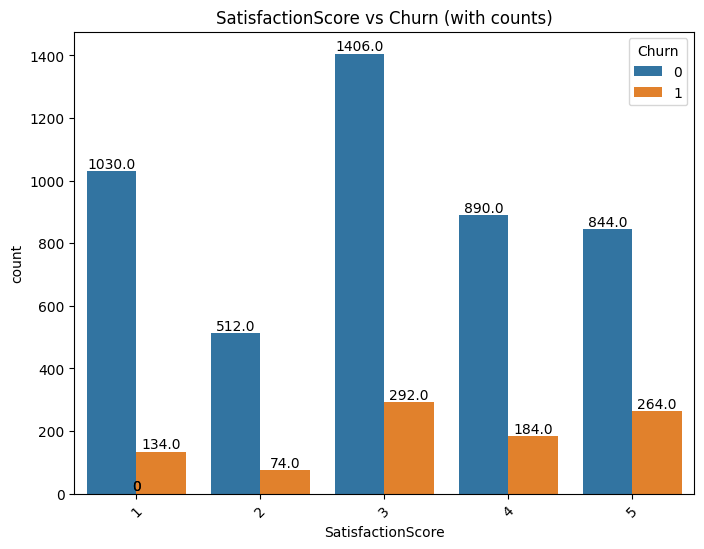

In [56]:
plt.figure(figsize=(8,6))

# Crosstab of SatisfactionScore vs Churn
ax = sns.countplot(x='SatisfactionScore', hue='Churn', data=data)

# Visualization of SatisfactionScore vs Churn
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.title('SatisfactionScore vs Churn (with counts)')
plt.ylabel('count')
plt.show()

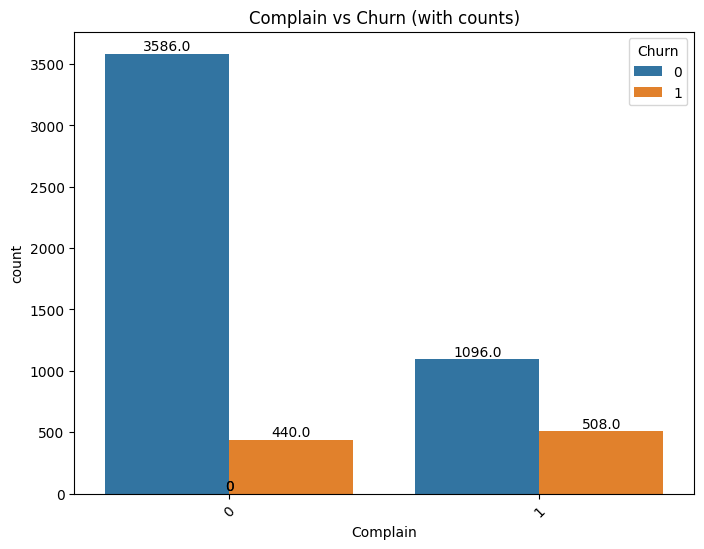

In [57]:
plt.figure(figsize=(8,6))

# Crosstab of Complain vs Churn
ax = sns.countplot(x='Complain', hue='Churn', data=data)

# Visualization of Complain vs Churn
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.title('Complain vs Churn (with counts)')
plt.ylabel('count')
plt.show()

## Cross-analysis of Characteristic Distributions
The five most critical factors for churn are:

**1. Tenure** 

Newly joined users (Tenure=0,1) experienced the highest churn rate (272+349), indicating an extremely high risk of new customer churn. The gradually decreasing churn rate among long-term customers suggests effective customer service and brand engagement.

**2. CityTier** 

Churn rate is significantly higher in third-tier cities (368/1722 ≈ 21%), while it is lower in first-tier cities (532/3666 ≈ 14.5%). This indicates a clear correlation between city tier and customer retention, with third-tier cities requiring particular attention.

**3. PreferredPaymentMode** 

Users using COD (Cash on Delivery), Debit Card, or e-wallet tend to have higher churn rates. Certain payment habits exhibit distinct churn characteristics; it is recommended to design retention strategies tailored to payment preferences.

**4. SatisfactionScore** 

Low-score users (scores 1 and 2) have exceptionally high churn rates: approximately 11.5% for score 1 and 12.6% for score 2. The significantly lower churn rate among high-scoring (4, 5) individuals indicates a strong negative correlation between "service satisfaction" and churn.

**5. Complaints**: 
A high of 508 individuals had a churn rate of 1, compared to only 440 who did not complain. The churn rate among complainants is far higher than that among non-complainants, demonstrating that "complaints" are a strong early warning factor for churn.


# Data Clean (Checking for Missing Values ​​and Outliers)

In [62]:
# Checking for missing values
print(data.isnull().sum())
print("\n")


CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64




In [64]:
# copying data to data_clean for cleaning
data_clean = data.copy()

# Numeric fields are padded with the median.
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear',
            'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
for col in num_cols:
    data_clean[col] = data_clean[col].fillna(data_clean[col].median())

# Checking for missing values after cleaning
print(data_clean.isnull().sum())

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


In [65]:
# Checking for outliers
print(data.describe())

# IQR is used to identify outliers
def remove_outlier_by_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

for col in ['WarehouseToHome', 'NumberOfAddress', 'OrderCount', 'DaySinceLastOrder',  'CashbackAmount']:
    data_clean = remove_outlier_by_iqr(data_clean, col)

         CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min     

In [61]:
# Checking for outliers after cleaning
print(data_clean.describe())

         CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   4501.000000  4501.000000  4501.000000  4501.000000      4501.000000   
mean   52792.589202     0.181293     8.852033     1.654966        15.605199   
std     1626.894425     0.385304     7.782565     0.914471         8.003575   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51381.000000     0.000000     2.000000     1.000000         9.000000   
50%    52759.000000     0.000000     8.000000     1.000000        14.000000   
75%    54195.000000     0.000000    13.000000     3.000000        20.000000   
max    55630.000000     1.000000    51.000000     3.000000        36.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     4501.000000               4501.000000        4501.000000   
mean         2.933570                  3.678738           3.061542   
std          0.700022                  1.036174           1.377917   
min     